# 分析步骤
1. 对数据有基础的认识：数据样例，数值类型，统计量——得到一个直观的数据感受
2. 了解数据的特殊取值：`nan`,唯一值（值分布悬殊的特征）
3. 理解不同特征的数据类型：对应分布，统计结果，`value_counts`+图表
4. 找寻数据之间的关系：特征与特征（独立or相关），特征与目标（变化趋势，关联）
5. 生成报告*
<hr>

- 数据总体了解：
  - 读取数据集并了解数据集大小，原始特征维度；
  - 通过info熟悉数据类型；
  - 粗略查看数据集中各特征基本统计量；
- 缺失值和唯一值：
  - 查看数据缺失值情况
  - 查看唯一值特征情况
- 深入数据-查看数据类型
  - 类别型数据
  - 数值型数据
    - 离散数值型数据
    - 连续数值型数据
- 数据间相关关系
  - 特征和特征之间关系
  - 特征和目标变量之间关系
- 用pandas_profiling生成数据报告  


# 数据总体了解

## 文件读取
- 数据样本查看

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings

warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [2]:
# 读取文件，显示样例
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('testA.csv')
df_train.shape,df_test.shape

((800000, 47), (200000, 48))

In [3]:
df_train.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n2.1,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,110000.0,2,2014-07-01,1,1,137.0,32,17.05,0.0,730.0,734.0,7.0,0.0,0.0,24178.0,48.9,27.0,0,0,Aug-2001,1.0,1.0,0.0,2.0,2.0,2.0,4.0,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,46000.0,2,2012-08-01,0,0,156.0,18,27.83,0.0,700.0,704.0,13.0,0.0,0.0,15096.0,38.9,18.0,1,0,May-2002,1723.0,1.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,74000.0,2,2015-10-01,0,0,337.0,14,22.77,0.0,675.0,679.0,11.0,0.0,0.0,4606.0,51.8,27.0,0,0,May-2006,0.0,1.0,0.0,0.0,3.0,3.0,0.0,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,118000.0,1,2015-08-01,0,4,148.0,11,17.21,0.0,685.0,689.0,9.0,0.0,0.0,9948.0,52.6,28.0,1,0,May-1999,4.0,1.0,6.0,4.0,6.0,6.0,4.0,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,29000.0,2,2016-03-01,0,10,301.0,21,32.16,0.0,690.0,694.0,12.0,0.0,0.0,2942.0,32.0,27.0,0,0,Aug-1977,11.0,1.0,1.0,2.0,7.0,7.0,2.0,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


In [4]:
df_test.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n2.1,n2.2,n2.3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,800000,14000.0,3,10.99,458.28,B,B3,7027.0,10+ years,0,80000.0,0,2014-07-01,0,163.0,21,10.56,1.0,715.0,719.0,17.0,0.0,0.0,9846.0,30.7,29.0,0,0,Nov-1974,0.0,1.0,1.0,4.0,6.0,6.0,6.0,6.0,6.0,8.0,4.0,15.0,19.0,6.0,17.0,0.0,0.0,1.0,3.0
1,800001,20000.0,5,14.65,472.14,C,C5,60426.0,10+ years,0,50000.0,0,2015-07-01,2,235.0,8,21.40,2.0,670.0,674.0,5.0,0.0,0.0,8946.0,56.6,14.0,0,0,Jul-2001,5.0,1.0,2.0,1.0,3.0,3.0,3.0,3.0,1.0,1.0,3.0,3.0,9.0,3.0,5.0,0.0,0.0,2.0,2.0
2,800002,12000.0,3,19.99,445.91,D,D4,23547.0,2 years,1,60000.0,2,2016-10-01,0,526.0,20,33.50,0.0,710.0,714.0,12.0,0.0,0.0,970.0,17.6,43.0,1,0,Aug-2006,0.0,1.0,0.0,1.0,4.0,4.0,4.0,4.0,1.0,1.0,36.0,5.0,6.0,4.0,12.0,0.0,0.0,0.0,7.0
3,800003,17500.0,5,14.31,410.02,C,C4,636.0,4 years,0,37000.0,1,2014-11-01,4,248.0,11,13.95,0.0,685.0,689.0,10.0,1.0,1.0,10249.0,52.3,18.0,0,0,Jul-2002,4.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,4.0,7.0,2.0,8.0,14.0,2.0,10.0,0.0,0.0,0.0,3.0
4,800004,35000.0,3,17.09,1249.42,D,D1,368446.0,< 1 year,1,80000.0,1,2017-10-01,0,115.0,8,24.97,0.0,685.0,689.0,19.0,0.0,0.0,33199.0,35.6,22.0,0,0,Dec-2000,0.0,1.0,0.0,8.0,11.0,11.0,11.0,11.0,9.0,11.0,3.0,16.0,18.0,11.0,19.0,0.0,0.0,0.0,1.0


In [12]:
test_feats = df_test.columns.tolist()
train_feats = df_train.columns.tolist()

print('The feature in train and not in test is:{}'.format(set(train_feats)-set(test_feats)))
print('The feature in train and not in test is:{}'.format(set(test_feats)-set(train_feats)))

The feature in train and not in test is:{'isDefault'}
The feature in train and not in test is:{'n2.2', 'n2.3'}


## 小结（所有字段解释）
- 数据和特征量:训练集&测试集4：1，训练集特征相比测试集（多`isDefault(预测量)`，少`n2.2,n2.3`）
- 字段与预测量关系猜测(**重要特征**，*不确定含义特征*，普通特征)
    - [x] **loanAmnt**: 贷款金额，金额大说明是大客户，信用等级应该较高，违约可能性较低，但不排除资金链断裂
    - [x] **term**：贷款期限，贷款时间越长约有可能违约？（也不一定，时间长可能周转）
    - interestRate:贷款利率，利率高？
    - [x] **installment**:分期付款金额，如果分期要还的少，可以长远慢慢还，不太可能违约
    - [x] **grade**：贷款等级，直接与客户信用挂钩的数据，一个强特征
    - [x] **subGrade**：贷款等级之子等级，和grade有直接关系，是否可考虑直接替换掉grade（两者类似，后者更详细）
    - [x] **employmentTitle**: 就业职称，脱敏转换成了数字，但不同行业的人信用会有较大差别
    - [x] **employmentLength**: 就业年限，就业越久的人对信用越看重？也有可能太久了对信用不需要了
    - [x] **homeOwnership**：借款人在登记时提供的房屋所有权状况，如果有房那违约的可能性就更小
    - [x] **annualIncome**: 年收入，收入高自然能够还款
    - *verificationStatus*: 验证状态，尚不明确的特征
    - issueDate: 贷款发放的月份，没啥用？
    - [x] **purpose**: 借款人在贷款申请时的贷款用途类别，不同用途应该不一样
    - postCode：借款人在贷款申请中提供的邮政编码的前3位数字、
    - reginCode：地区编码
    - [x] **dti**: 债务收入比，收入大于债务更可能还款
    - [x] **delinquency_2years**:借款人过去2年信用档案中逾期30天以上的违约事件数，违约次数越多越不可能还款
    - *ficoRangeLow*：借款人在贷款发放时的fico所属的下限范围
    - *ficoRangeHigh*：借款人在贷款发放时的fico所属的上限范围
    - [x] **openAcc**：借款人信用档案中未结信用额度的数量，数量越大越容易违约？
    - *pubRec*：贬损公共记录的数量
    - *pubRecBankruptcies*：公开记录清除的数量
    - [x] **revolBal**：信贷周转余额合计，余额多->有能力还款？
    - [x] **revolUtil**：循环额度利用率，或借款人使用的相对于所有可用循环信贷的信贷金额
    - [x] **totalAcc**：借款人信用档案中当前的信用额度总数
    - initialListStatus：贷款的初始列表状态
    - [x] **applicationType**：表明贷款是个人申请还是与两个共同借款人的联合申请，两个人同时违约概率应该低于一个人
    - earliesCreditLine：借款人最早报告的信用额度开立的月份
    - [x] **title**：借款人提供的贷款名称，不知道具体影响，但应该有区分
    - [x] **policyCode**：公开可用的策略_代码=1新产品不公开可用的策略_代码=2
    - [x] **n系列匿名特征**：匿名特征n0-n14，为一些贷款人行为计数特征的处理，可能存在隐藏关联，需要进一步数据分析

## 基本统计量查看

In [17]:
df_train.info(),df_train.select_dtypes(include=['object']).columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

(None,
 Index(['grade', 'subGrade', 'employmentLength', 'issueDate',
        'earliesCreditLine'],
       dtype='object'))

In [14]:
df_train.describe()

,id,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,verificationStatus,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,title,policyCode,n0,n1,n2,n2.1,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,799999.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,800000.000000,799999.000000,800000.000000,799761.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,799595.000000,8.000000e+05,799469.000000,800000.000000,800000.000000,800000.000000,799999.000000,800000.0,759730.000000,759730.000000,759730.000000,759730.000000,766761.000000,759730.000000,759730.000000,759730.000000,759729.000000,759730.000000,766761.000000,730248.000000,759730.000000,759730.000000,759730.000000
mean,399999.500000,14416.818875,3.482745,13.238391,437.947723,72005.351714,0.614213,7.613391e+04,1.009683,0.199513,1.745982,258.535648,16.385758,18.284557,0.318239,696.204081,700.204226,11.598020,0.214915,0.134163,1.622871e+04,51.790734,24.998861,0.416953,0.019267,1754.113589,1.0,0.511932,3.642330,5.642648,5.642648,4.735641,8.107937,8.575994,8.282953,14.622488,5.592345,11.643896,0.000815,0.003384,0.089366,2.178606
std,230940.252013,8716.086178,0.855832,4.765757,261.460393,106585.640204,0.675749,6.894751e+04,0.782716,0.399634,2.367453,200.037446,11.036679,11.150155,0.880325,31.865995,31.866674,5.475286,0.606467,0.377471,2.245802e+04,24.516126,11.999201,0.493055,0.137464,7941.474040,0.0,1.333266,2.246825,3.302810,3.302810,2.949969,4.799210,7.400536,4.561689,8.124610,3.216184,5.484104,0.030075,0.062041,0.509069,1.844377
min,0.000000,500.000000,3.000000,5.310000,15.690000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,630.000000,634.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199999.750000,8000.000000,3.000000,9.750000,248.450000,427.000000,0.000000,4.560000e+04,0.000000,0.000000,0.000000,103.000000,8.000000,11.790000,0.000000,670.000000,674.000000,8.000000,0.000000,0.000000,5.944000e+03,33.400000,16.000000,0.000000,0.000000,0.000000,1.0,0.000000,2.000000,3.000000,3.000000,3.000000,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,399999.500000,12000.000000,3.000000,12.740000,375.135000,7755.000000,1.000000,6.500000e+04,1.000000,0.000000,0.000000,203.000000,14.000000,17.610000,0.000000,690.000000,694.000000,11.000000,0.000000,0.000000,1.113200e+04,52.100000,23.000000,0.000000,0.000000,1.000000,1.0,0.000000,3.000000,5.000000,5.000000,4.000000,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,599999.250000,20000.000000,3.000000,15.990000,580.710000,117663.500000,1.000000,9.000000e+04,2.000000,0.000000,4.000000,395.000000,22.000000,24.060000,0.000000,710.000000,714.000000,14.000000,0.000000,0.000000,1.973400e+04,70.700000,32.000000,1.000000,0.000000,5.000000,1.0,0.000000,5.000000,7.000000,7.000000,6.000000,11.000000,11.000000,10.000000,19.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000
max,799999.000000,40000.000000,5.000000,30.990000,1715.420000,378351.000000,5.000000,1.099920e+07,2.000000,1.000000,13.000000,940.000000,50.000000,999.000000,39.000000,845.000000,850.000000,86.000000,86.000000,12.000000,2.904836e+06,892.300000,162.000000,1.000000,1.000000,61680.000000,1.0,51.000000,33.000000,63.000000,63.000000,49.000000,70.000000,132.000000,79.000000,128.000000,45.000000,82.000000,4.000000,4.000000,39.000000,30.000000


In [15]:
df_test.describe()

,id,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,verificationStatus,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,title,policyCode,n0,n1,n2,n2.1,n2.2,n2.3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,199939.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,199884.000000,2.000000e+05,199873.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.0,189889.000000,189889.000000,189889.000000,189889.000000,189889.000000,189889.000000,191606.000000,189889.000000,189889.000000,189889.000000,189889.000000,189889.000000,191606.000000,182425.000000,189889.000000,189889.000000,189889.000000
mean,899999.500000,14436.954125,3.481690,13.244800,438.737804,72435.750740,0.614100,7.645184e+04,1.010430,1.744410,258.259535,16.430830,18.291282,0.315895,696.166400,700.166530,11.580340,0.21553,0.135293,1.625583e+04,51.875121,24.921810,0.416650,0.019465,1778.180570,1.0,0.507865,3.648110,5.647141,5.647141,5.647141,5.647141,4.732545,8.093976,8.527334,8.274840,14.592551,5.596296,11.626891,0.000833,0.003618,0.088341,2.180316
std,57735.171256,8737.430326,0.855195,4.766528,262.246698,106892.374933,0.675465,7.766237e+04,0.781732,2.367497,199.752214,11.061279,11.493806,0.876316,31.852619,31.853228,5.455525,0.60653,0.380665,2.243082e+04,24.555849,11.943628,0.493005,0.138153,7983.247915,0.0,1.315019,2.257779,3.308588,3.308588,3.308588,3.308588,2.959386,4.803759,7.303106,4.550902,8.109357,3.220978,5.464619,0.030516,0.064276,0.505161,1.841987
min,800000.000000,500.000000,3.000000,5.310000,14.010000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,625.000000,629.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,849999.750000,8000.000000,3.000000,9.750000,248.890000,420.000000,0.000000,4.600000e+04,0.000000,0.000000,103.000000,8.000000,11.830000,0.000000,670.000000,674.000000,8.000000,0.00000,0.000000,5.940000e+03,33.500000,16.000000,0.000000,0.000000,0.000000,1.0,0.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,899999.500000,12000.000000,3.000000,12.740000,375.430000,7836.000000,1.000000,6.500000e+04,1.000000,0.000000,203.000000,14.000000,17.620000,0.000000,690.000000,694.000000,11.000000,0.00000,0.000000,1.114000e+04,52.300000,23.000000,0.000000,0.000000,2.000000,1.0,0.000000,3.000000,5.000000,5.000000,5.000000,5.000000,4.000000,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,949999.250000,20000.000000,3.000000,15.990000,580.942500,119739.250000,1.000000,9.000000e+04,2.000000,4.000000,392.000000,22.000000,24.080000,0.000000,710.000000,714.000000,14.000000,0.00000,0.000000,1.977925e+04,70.800000,32.000000,1.000000,0.000000,5.000000,1.0,0.000000,5.000000,7.000000,7.000000,7.000000,7.000000,6.000000,11.000000,11.000000,10.000000,19.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000
max,999999.000000,40000.000000,5.000000,30.990000,1715.420000,378338.000000,5.000000,9.500000e+06,2.000000,13.000000,931.000000,50.000000,999.000000,28.000000,845.000000,850.000000,90.000000,61.00000,11.000000,1.743266e+06,366.600000,127.000000,1.000000,1.000000,61676.000000,1.0,32.000000,32.000000,51.000000,51.000000,51.000000,51.000000,63.000000,70.000000,99.000000,83.000000,112.000000,41.000000,90.000000,3.000000,3.000000,25.000000,28.000000


## 小结
- 5个非数值型特征需要处理
- 许多特征有缺失值
- 训练集和测试集各个特征的分布基本相同，

#  特殊取值查看与处理

##  缺失值

In [18]:
# 查看缺失值
print('含缺失值字段个数{},具体缺失情况:\n{}'.format(df_train.isnull().any().sum(),df_train.isnull().sum()))

含缺失值字段个数22,具体缺失情况:
id                        0
loanAmnt                  0
term                      0
interestRate              0
installment               0
grade                     0
subGrade                  0
employmentTitle           1
employmentLength      46799
homeOwnership             0
annualIncome              0
verificationStatus        0
issueDate                 0
isDefault                 0
purpose                   0
postCode                  1
regionCode                0
dti                     239
delinquency_2years        0
ficoRangeLow              0
ficoRangeHigh             0
openAcc                   0
pubRec                    0
pubRecBankruptcies      405
revolBal                  0
revolUtil               531
totalAcc                  0
initialListStatus         0
applicationType           0
earliesCreditLine         0
title                     1
policyCode                0
n0                    40270
n1                    40270
n2                    40270
n

In [19]:
# 对缺失率进行评估，若缺失小则填充，缺失大则删去
null_feat2percent = (df_train.isnull().sum()/df_train.shape[0]).to_dict()
null_feat2percent  # 各个比例都还小可以接受

{'id': 0.0,
 'loanAmnt': 0.0,
 'term': 0.0,
 'interestRate': 0.0,
 'installment': 0.0,
 'grade': 0.0,
 'subGrade': 0.0,
 'employmentTitle': 1.25e-06,
 'employmentLength': 0.05849875,
 'homeOwnership': 0.0,
 'annualIncome': 0.0,
 'verificationStatus': 0.0,
 'issueDate': 0.0,
 'isDefault': 0.0,
 'purpose': 0.0,
 'postCode': 1.25e-06,
 'regionCode': 0.0,
 'dti': 0.00029875,
 'delinquency_2years': 0.0,
 'ficoRangeLow': 0.0,
 'ficoRangeHigh': 0.0,
 'openAcc': 0.0,
 'pubRec': 0.0,
 'pubRecBankruptcies': 0.00050625,
 'revolBal': 0.0,
 'revolUtil': 0.00066375,
 'totalAcc': 0.0,
 'initialListStatus': 0.0,
 'applicationType': 0.0,
 'earliesCreditLine': 0.0,
 'title': 1.25e-06,
 'policyCode': 0.0,
 'n0': 0.0503375,
 'n1': 0.0503375,
 'n2': 0.0503375,
 'n2.1': 0.0503375,
 'n4': 0.04154875,
 'n5': 0.0503375,
 'n6': 0.0503375,
 'n7': 0.0503375,
 'n8': 0.05033875,
 'n9': 0.0503375,
 'n10': 0.04154875,
 'n11': 0.08719,
 'n12': 0.0503375,
 'n13': 0.0503375,
 'n14': 0.0503375}

<AxesSubplot:>

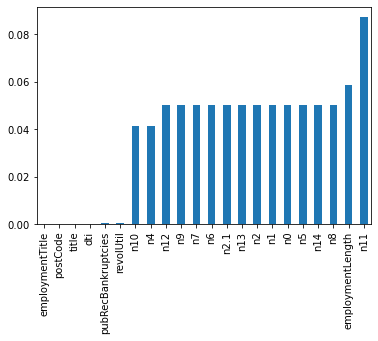

In [20]:
# 可视化缺失率
null_feat_percent = df_train.isnull().sum()/df_train.shape[0]
null_feat_percent = null_feat_percent[null_feat_percent>0]
null_feat_percent.sort_values(inplace=True)
null_feat_percent.plot.bar()

## 唯一值

In [21]:
# 查看训练集和测试集中特征属性只有单值的特征，这类特征对分类无用
one_value_feat_train = [col for col in df_train.columns if df_train[col].nunique() <= 1]
one_value_feat_test = [col for col in df_test.columns if df_test[col].nunique() <= 1]
one_value_feat_train,one_value_feat_test

(['policyCode'], ['policyCode'])

## 小结
训练集含47列，其中22列包含缺失值，但缺失比例较小可以接受，训练测试集中`policyCode(公开可用的策略_代码)`只有单值，对分类无效，可考虑删除

# 数据类型划分

## 查看特征类型

In [22]:
numerical_feats = df_train.select_dtypes(exclude=['object']).columns.tolist()
category_feats = df_train.select_dtypes(include=['object']).columns.tolist()
numerical_feats,category_feats

(['id',
  'loanAmnt',
  'term',
  'interestRate',
  'installment',
  'employmentTitle',
  'homeOwnership',
  'annualIncome',
  'verificationStatus',
  'isDefault',
  'purpose',
  'postCode',
  'regionCode',
  'dti',
  'delinquency_2years',
  'ficoRangeLow',
  'ficoRangeHigh',
  'openAcc',
  'pubRec',
  'pubRecBankruptcies',
  'revolBal',
  'revolUtil',
  'totalAcc',
  'initialListStatus',
  'applicationType',
  'title',
  'policyCode',
  'n0',
  'n1',
  'n2',
  'n2.1',
  'n4',
  'n5',
  'n6',
  'n7',
  'n8',
  'n9',
  'n10',
  'n11',
  'n12',
  'n13',
  'n14'],
 ['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine'])

## 划分离散型和连续型数值特征

In [24]:

numerical_serial_feats = []  # 连续型特征
numerical_discrete_feats = []  # 离散型特征

for feat in numerical_feats:
    feat_values = df_train[feat].nunique()
    if feat_values <= 10:
        numerical_discrete_feats.append(feat)
        continue
    numerical_serial_feats.append(feat)

print('连续型特征:{}\n,离散型特征:{}'.format(numerical_serial_feats,numerical_discrete_feats))

连续型特征:['id', 'loanAmnt', 'interestRate', 'installment', 'employmentTitle', 'annualIncome', 'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc', 'title', 'n0', 'n1', 'n2', 'n2.1', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n13', 'n14']
,离散型特征:['term', 'homeOwnership', 'verificationStatus', 'isDefault', 'initialListStatus', 'applicationType', 'policyCode', 'n11', 'n12']


## 查看离散型变量的取值情况

In [25]:
for feat in numerical_discrete_feats:
    print('feat:{}\nvalue_counts:\n{}\n'.format(feat,df_train[feat].value_counts()))

feat:term
value_counts:
3    606902
5    193098
Name: term, dtype: int64

feat:homeOwnership
value_counts:
0    395732
1    317660
2     86309
3       185
5        81
4        33
Name: homeOwnership, dtype: int64

feat:verificationStatus
value_counts:
1    309810
2    248968
0    241222
Name: verificationStatus, dtype: int64

feat:isDefault
value_counts:
0    640390
1    159610
Name: isDefault, dtype: int64

feat:initialListStatus
value_counts:
0    466438
1    333562
Name: initialListStatus, dtype: int64

feat:applicationType
value_counts:
0    784586
1     15414
Name: applicationType, dtype: int64

feat:policyCode
value_counts:
1.0    800000
Name: policyCode, dtype: int64

feat:n11
value_counts:
0.0    729682
1.0       540
2.0        24
4.0         1
3.0         1
Name: n11, dtype: int64

feat:n12
value_counts:
0.0    757315
1.0      2281
2.0       115
3.0        16
4.0         3
Name: n12, dtype: int64



## 对连续型特征分布可视化

In [26]:
f = pd.melt(df_train, value_vars=numerical_serial_feats)  # 将所有列的变量转换到一列以variable命名，第二列对应其value值
f

,variable,value
0,id,0.0
1,id,1.0
2,id,2.0
3,id,3.0
4,id,4.0
...,...,...
26399995,n14,3.0
26399996,n14,0.0
26399997,n14,4.0
26399998,n14,5.0


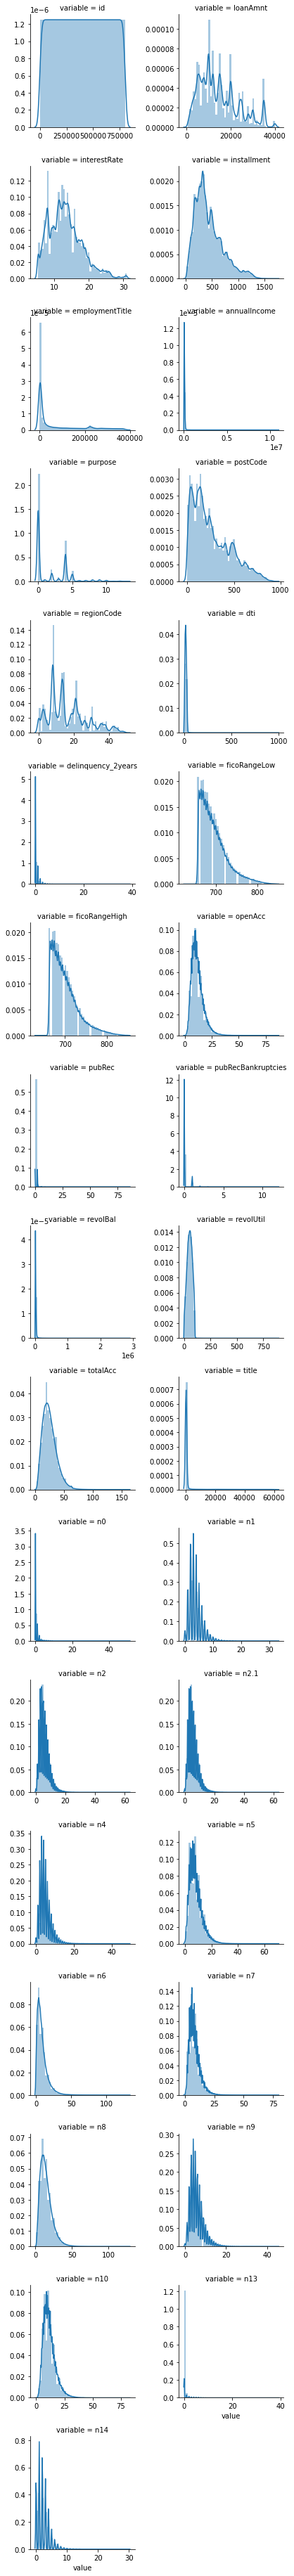

In [27]:
# 对上述数据进行绘图，查看数据分布是否为正态，非正态分布可log后观察
g = sns.FacetGrid(f, col='variable', col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

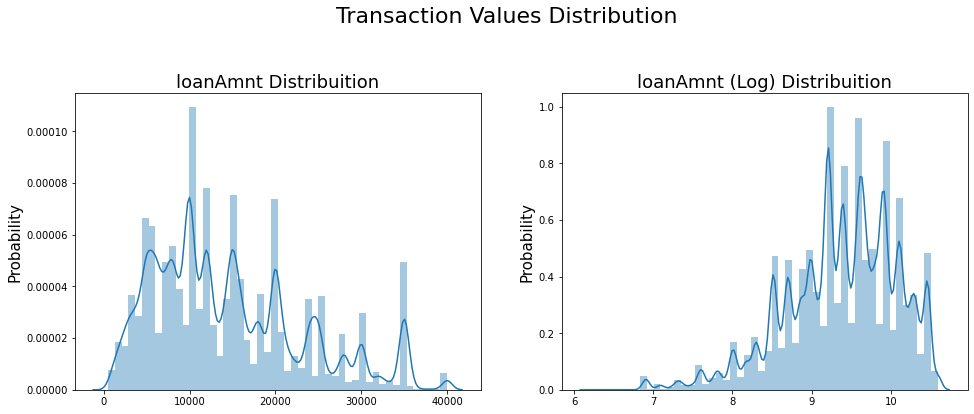

In [48]:
def draw_origin_log_distribuition_of_feat(data, feat):
    # 绘制原始分布与log后分布的差别
    plt.figure(figsize=(16,12))
    plt.suptitle('Transaction Values Distribution', fontsize=22)
    plt.subplot(221)
    sub_plot_1 = sns.distplot(data[feat])
    sub_plot_1.set_title("{} Distribuition".format(feat), fontsize=18)
    sub_plot_1.set_xlabel("")
    sub_plot_1.set_ylabel("Probability", fontsize=15)

    plt.subplot(222)
    sub_plot_2 = sns.distplot(np.log(data[feat]))
    sub_plot_2.set_title("{} (Log) Distribuition".format(feat), fontsize=18)
    sub_plot_2.set_xlabel("")
    sub_plot_2.set_ylabel("Probability", fontsize=15)

# ['loanAmnt','interestRate','installment','postCode','openAcc','totalAcc','n1','n2','n2.1','n4','n5','n6','n7','n8','n9','n10']
draw_origin_log_distribuition_of_feat(df_train, 'loanAmnt')

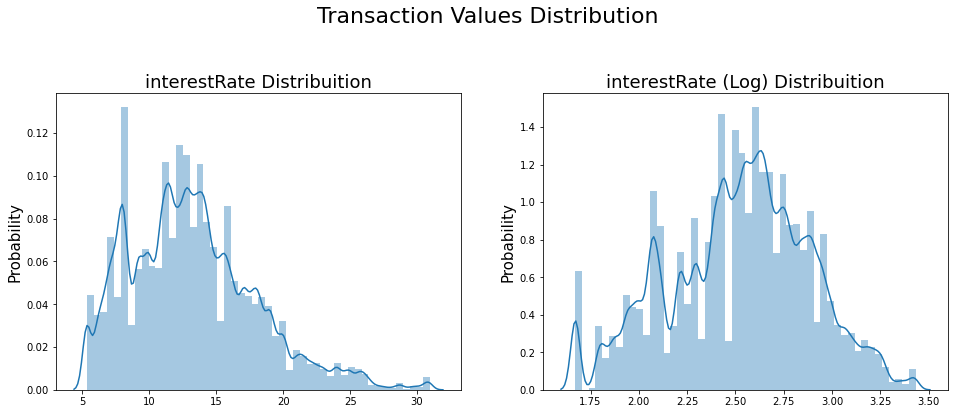

In [49]:
draw_origin_log_distribuition_of_feat(df_train, 'interestRate')

## 非数值型变量取值统计

In [29]:
category_feats

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']

In [30]:
for feat in category_feats:
    print('feat:{}\nvalue_counts:\n{}\n'.format(feat,df_train[feat].value_counts()))

feat:grade
value_counts:
B    233690
C    227118
A    139661
D    119453
E     55661
F     19053
G      5364
Name: grade, dtype: int64

feat:subGrade
value_counts:
C1    50763
B4    49516
B5    48965
B3    48600
C2    47068
C3    44751
C4    44272
B2    44227
B1    42382
C5    40264
A5    38045
A4    30928
D1    30538
D2    26528
A1    25909
D3    23410
A3    22655
A2    22124
D4    21139
D5    17838
E1    14064
E2    12746
E3    10925
E4     9273
E5     8653
F1     5925
F2     4340
F3     3577
F4     2859
F5     2352
G1     1759
G2     1231
G3      978
G4      751
G5      645
Name: subGrade, dtype: int64

feat:employmentLength
value_counts:
10+ years    262753
2 years       72358
< 1 year      64237
3 years       64152
1 year        52489
5 years       50102
4 years       47985
6 years       37254
8 years       36192
7 years       35407
9 years       30272
Name: employmentLength, dtype: int64

feat:issueDate
value_counts:
2016-03-01    29066
2015-10-01    25525
2015-07-01    24496
201

## 小结
- 离散型变量的取值情况
    - term，homeOwnership(前两个取值)，verificationStatus,initialListStatus的分布较为均匀
    - **isDefault**大概4：1，applicationType,n11,n12分布十分不均匀
    - policyCode只有一个取值，删除
- 连续型特征的分布情况
    - loanAmnt,interestRate，installment,postCode,openAcc,totalAcc,n1,n2,n2.1,n4,n5,n6,n7,n8,n9,n10都有符合正态分布的趋势，可以考虑对部分进行log观察对比前后效果
    - employmentTitle,annualIncome,purpose,regionCode,dti,delinquency_2years,pubRec,pubRecBankruptcies,revolBal,revolUtil,title,n0,n13,n14的分布都千奇百怪，暂不作为分类特征(后续可能添加)
- 非数值型变量取值统计
    - grade，subgrade，employmentLength分布都比较均匀
    - 日期相关的issueDate,earliesCreditLine前面分布较均匀，后面分布稀疏

至此，记录一下要用的特征有
- [x] **loanAmnt**: 贷款金额，金额大说明是大客户，信用等级应该较高，违约可能性较低，但不排除资金链断裂
- [x] **term**：贷款期限，贷款时间越长约有可能违约？（也不一定，时间长可能周转）
- [x] **installment**:分期付款金额，如果分期要还的少，可以长远慢慢还，不太可能违约
- [x] **grade**：贷款等级，直接与客户信用挂钩的数据，一个强特征
- [x] **subGrade**：贷款等级之子等级，和grade有直接关系，是否可考虑直接替换掉grade（两者类似，后者更详细）
- [x] **employmentLength**: 就业年限，就业越久的人对信用越看重？也有可能太久了对信用不需要了
- [x] **homeOwnership**：借款人在登记时提供的房屋所有权状况，如果有房那违约的可能性就更小
- [x] **purpose**: 借款人在贷款申请时的贷款用途类别，不同用途应该不一样
- [x] **openAcc**：借款人信用档案中未结信用额度的数量，数量越大越容易违约？
- [x] **totalAcc**：借款人信用档案中当前的信用额度总数
- [x] **n1,n2,n2.1,n4,n5,n6,n7,n8,n9,n10**
    
> tricks
- 对离散型特征和非数值型特征，用`value_counts`统计查看对应取值的分布情况，对于分布单一或偏差十分严重的特征可考虑去除
- 对连续型特征，除了`value_counts`以外，通过图表更能直观显示数据分布，对不是正态分布的可尝试取`log`观察对比，根据分布情况考虑
    

# 数据之间关系

In [31]:
# 根据类别不同（y值）x可视化某个特征的分布，对比两种不同分类结果在特征上的体现
df_train_default = df_train[df_train['isDefault'] == 1]   # 违约的数据
df_train_no_default = df_train[df_train['isDefault'] == 0]  # 未违约的数据

## 查看非数值型变量在不同y值上的分布

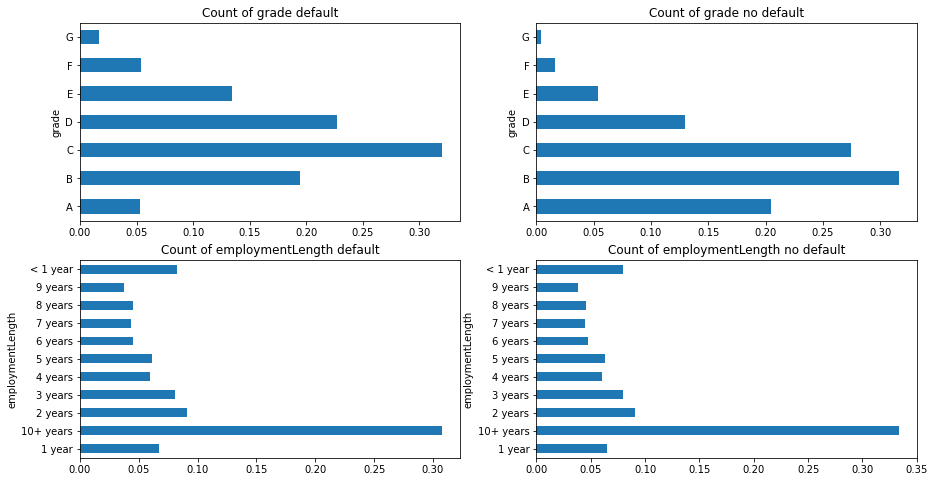

In [33]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(15,8))  # 创建子画布
def draw_feat_bar(data, feat, ax, title):
    """
    绘制数据分布在指定data下的结果,以比例显示
    """
    (data.groupby(feat)[feat].count()/len(data)).plot(kind='barh', ax=ax,title=title)

# df_train_default.groupby('grade')['grade'].count().plot(kind='barh',ax=ax1,title='Count of grade default')
draw_feat_bar(df_train_default, 'grade', ax1,'Count of grade default')
draw_feat_bar(df_train_no_default, 'grade', ax2, 'Count of grade no default')
draw_feat_bar(df_train_default, 'employmentLength', ax3, 'Count of employmentLength default')
draw_feat_bar(df_train_no_default, 'employmentLength', ax4, 'Count of employmentLength no default')

## 查看连续型变量在不同y值上的分布

<AxesSubplot:title={'center':'Log Loan Amt - Not Fraud'}, ylabel='Frequency'>

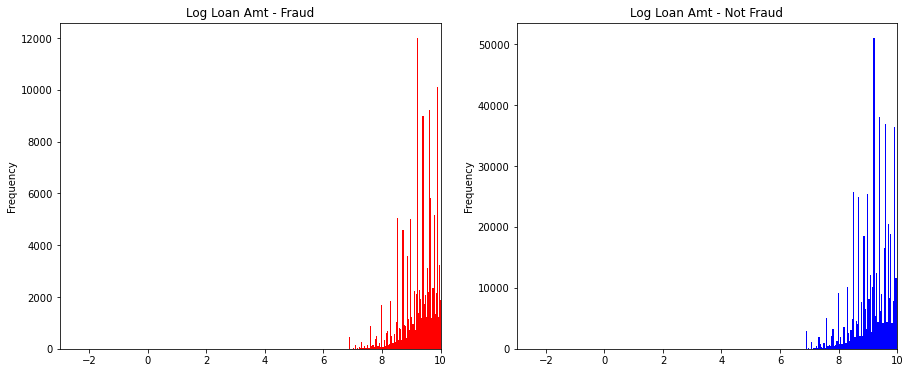

In [34]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 6))
df_train.loc[df_train['isDefault'] == 1] \
    ['loanAmnt'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log Loan Amt - Fraud',
          color='r',
          xlim=(-3, 10),
         ax= ax1)
df_train.loc[df_train['isDefault'] == 0] \
    ['loanAmnt'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log Loan Amt - Not Fraud',
          color='b',
          xlim=(-3, 10),
         ax=ax2)

In [ ]:
# 生成报告
import pandas_profiling

pfr = pandas_profiling.ProfileReport(df_train)
pfr.to_file("./data_analysis.html")

## 小结
- 非数值型变量在不同y值上的分布
- 连续型变量在不同y值上的分布 